# Лаб работа №4
Вариант 6 - Продажа домов в округе кинг

Задача регрессии заключается в предсказании цен на недвижимость, что поможет риэлторам и аналитикам оценить справедливую рыночную стоимость объектов.

Задача классификации предполагает определение вероятности того, что цена дома будет выше или ниже медианы рынка, а также классификацию домов по ценовым категориям (например, низкая, средняя, высокая). Это поможет выявить предпочтения покупателей.

Для оценки регрессионных моделей будут использоваться метрики MAE (средняя абсолютная ошибка) и R² (коэффициент детерминации), с целью достижения MAE менее 10% от средней цены. В классификации основное внимание уделяется метрикам accuracy и F1-score, с целевым значением accuracy около 80%.

## Ориентиры для каждой задачи:
Регрессия: Медианная цена (price.median()) выбрана как стабильный ориентир.

Классификация: Ориентиром служит средняя вероятность предсказания класса выше медианы.

Анализ алгоритмов машинного обучения:

### Регрессия:

Линейная регрессия: Подходит для простых линейных зависимостей.

Дерево решений: Учет нелинейных зависимостей и сложных закономерностей.

Случайный лес: Ансамблевый метод, обобщающий данные и эффективно обрабатывающий выбросы.

### Классификация:

Логистическая регрессия: Простая модель для бинарной классификации.

Метод опорных векторов (SVM): Эффективен на данных с четкими разделениями.

Градиентный бустинг: Подходит для сложных и высокоразмерных данных, обеспечивает высокую точность.

## Выбор трех моделей для каждой задачи:

Регрессия: Линейная регрессия, Дерево решений, Случайный лес.

Классификация: Логистическая регрессия, Метод опорных векторов (SVM), Градиентный бустинг.

In [3]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")
random_state = 42

df = pd.read_csv(".//static//csv//kc_house_data.csv")
print(df.columns)
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

'X_train'

id             date      price  bedrooms  bathrooms  \
20962  1278000210  20150311T000000   110000.0         2       1.00   
12284  2193300390  20140923T000000   624000.0         4       3.25   
7343   4289900005  20141230T000000  1535000.0         4       3.25   
14247   316000145  20150325T000000   235000.0         4       1.00   
16670   629400480  20140619T000000   775000.0         4       2.75   
...           ...              ...        ...       ...        ...   
88     1332700270  20140519T000000   215000.0         2       2.25   
15031  7129303070  20140820T000000   735000.0         4       2.75   
5234   2432000130  20150414T000000   675000.0         3       1.75   
19980   774100475  20140627T000000   415000.0         3       2.75   
3671   8847400115  20140723T000000   590000.0         3       2.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
20962          828      4524     1.0           0     0  ...              0   
12284         2810     11250     1.0           0     0  ...           1130   
7343          2850      4100     2.0           0     3  ...           1030   
14247         1360      7132     1.5           0     0  ...              0   
16670         3010     15992     2.0           0     0  ...              0   
...            ...       ...     ...         ...   ...  ...            ...   
88            1610      2040     2.0           0     0  ...              0   
15031         3040      2415     2.0           1     4  ...              0   
5234          1660      9549     1.0           0     0  ...              0   
19980         2600     64626     1.5           0     0  ...              0   
3671          2420    208652     1.5           0     0  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
20962      1968          2007    98001  47.2655 -122.244            828   
12284      1980             0    98052  47.6920 -122.099           2110   
7343       1908          2003    98122  47.6147 -122.285           2130   
14247      1941             0    98168  47.5054 -122.301           1280   
16670      1996             0    98075  47.5895 -121.994           3330   
...         ...           ...      ...      ...      ...            ...   
88         1979             0    98056  47.5180 -122.194           1950   
15031      1966             0    98118  47.5188 -122.256           2620   
5234       1956             0    98033  47.6503 -122.198           2090   
19980      2009             0    98014  47.7185 -121.405           1740   
3671       2005             0    98010  47.3666 -121.978           3180   

       sqft_lot15  above_median_price  price_category  
20962        5402                   0               0  
12284       11250                   1               1  
7343         4200                   1               2  
14247        7175                   0               0  
16670       12333                   1               2  
...           ...                 ...             ...  
88           2025                   0               0  
15031        2433                   1               2  
5234         9549                   1               1  
19980       64626                   0               1  
3671       212137                   1               1  

[17290 rows x 23 columns]

'y_train'

above_median_price
20962                   0
12284                   1
7343                    1
14247                   0
16670                   1
...                   ...
88                      0
15031                   1
5234                    1
19980                   0
3671                    1

[17290 rows x 1 columns]

'X_test'

id             date      price  bedrooms  bathrooms  \
11592  2028701000  20140529T000000   635200.0         4       1.75   
8984   9406500530  20140912T000000   249000.0         2       2.00   
8280   8097000330  20140721T000000   359950.0         3       2.75   
792    8081020370  20140709T000000  1355000.0         4       3.50   
10371  7518507580  20150502T000000   581000.0         2       1.00   
...           ...              ...        ...       ...        ...   
16733  7212650950  20140708T000000   336000.0         4       2.50   
13151  4365200620  20150312T000000   394000.0         3       1.00   
11667  4083304355  20150318T000000   675000.0         4       1.75   
3683   2891100820  20140825T000000   213500.0         3       1.00   
12059   952000640  20141027T000000   715000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
11592         1640      4240     1.0           0     0  ...            720   
8984          1090      1357     2.0           0     0  ...              0   
8280          2540      8604     2.0           0     0  ...              0   
792           3550     11000     1.0           0     2  ...           1290   
10371         1170      4080     1.0           0     0  ...              0   
...            ...       ...     ...         ...   ...  ...            ...   
16733         2530      8169     2.0           0     0  ...              0   
13151         1450      7930     1.0           0     0  ...            300   
11667         1530      3615     1.5           0     0  ...              0   
3683          1220      6000     1.0           0     0  ...              0   
12059         1670      5060     2.0           0     2  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
11592      1921             0    98117  47.6766 -122.368           1300   
8984       1990             0    98028  47.7526 -122.244           1078   
8280       1991             0    98092  47.3209 -122.185           2260   
792        1999             0    98006  47.5506 -122.134           4100   
10371      1909             0    98117  47.6784 -122.386           1560   
...         ...           ...      ...      ...      ...            ...   
16733      1993             0    98003  47.2634 -122.312           2220   
13151      1923             0    98126  47.5212 -122.371           1040   
11667      1913             0    98103  47.6529 -122.334           1650   
3683       1968             0    98002  47.3245 -122.209           1420   
12059      1925             0    98126  47.5671 -122.379           1670   

       sqft_lot15  above_median_price  price_category  
11592        4240                   1               1  
8984         1318                   0               0  
8280         7438                   0               1  
792         10012                   1               2  
10371        4586                   1               1  
...           ...                 ...             ...  
16733        8013                   0               1  
13151        7740                   0               1  
11667        4200                   1               1  
3683         6000                   0               0  
12059        5118                   1               2  

[4323 rows x 23 columns]

'y_test'

above_median_price
11592                   1
8984                    0
8280                    0
792                     1
10371                   1
...                   ...
16733                   0
13151                   0
11667                   1
3683                    0
12059                   1

[4323 rows x 1 columns]

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
waterfront               int64
view                     int64
condition                int64
grade                    int64
sqft_above               int64
sqft_basement            int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
above_median_price       int64
price_category        category
dtype: object


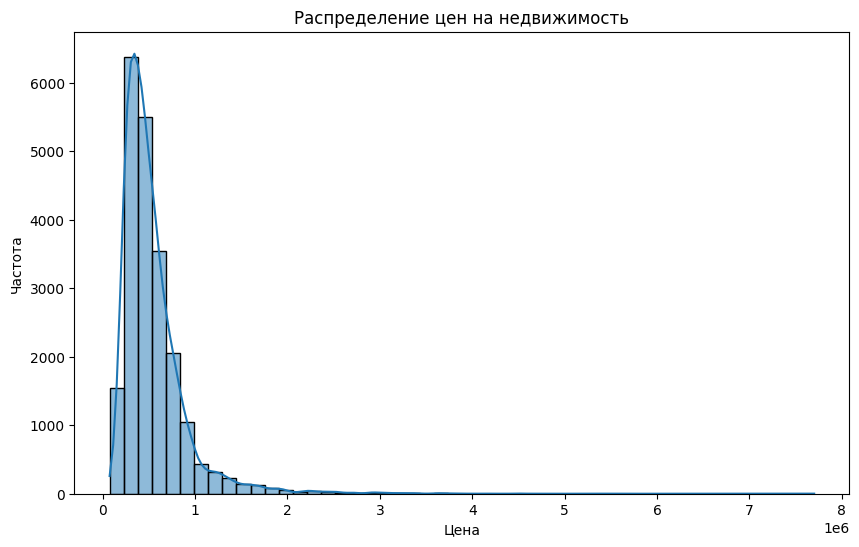

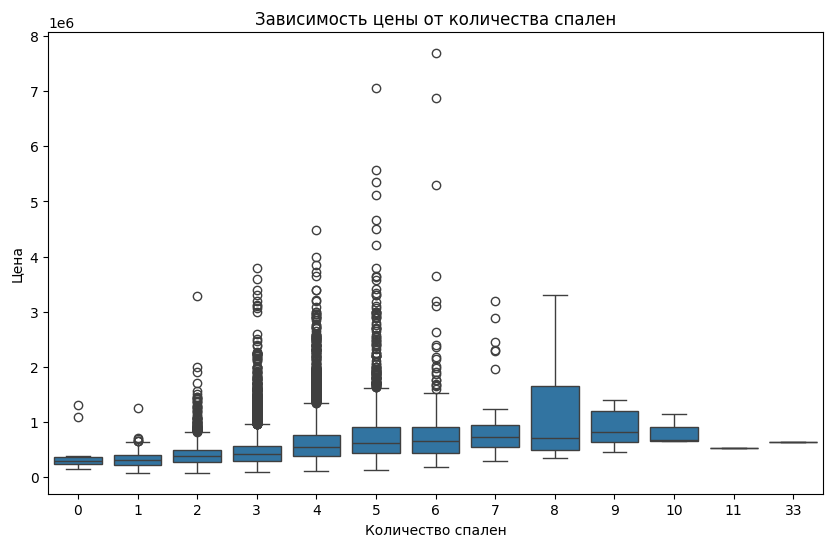

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

median_price = df['price'].median()
df['above_median_price'] = np.where(df['price'] > median_price, 1, 0)

X = df.drop(columns=['id', 'date', 'price', 'above_median_price'])
y = df['above_median_price']

df['price_category'] = pd.cut(df['price'], bins=[0, 300000, 700000, np.inf], labels=[0, 1, 2])

X = df.drop(columns=['id', 'date', 'price', 'price_category'])

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)

    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="above_median_price", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=42
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

print(df.dtypes)

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Зависимость цены от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена')
plt.show()

# Конвейеры предобработки

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline_end = StandardScaler()


# Построение конвейеров предобработки

class HouseFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Создание новых признаков
        X = X.copy()
        X["Living_area_to_Lot_ratio"] = X["sqft_living"] / X["sqft_lot"]
        return X
    def get_feature_names_out(self, features_in):
        # Добавление имен новых признаков
        new_features = ["Living_area_to_Lot_ratio"]
        return np.append(features_in, new_features, axis=0)


# Обработка числовых данных. Числовой конвейр: заполнение пропущенных значений медианой и стандартизация
preprocessing_num_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_cat_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

columns_to_drop = ["date"]
numeric_columns = ["sqft_living", "sqft_lot", "above_median_price"]
cat_columns = []

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num_class, numeric_columns),
        ("prepocessing_cat", preprocessing_cat_class, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('preprocessing_cat', preprocessing_cat_class, ["price_category"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("custom_features", HouseFeatures()),
        ("drop_columns", drop_columns),
    ]
)

In [6]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

sqft_living  sqft_lot  above_median_price          id      price  \
20962    -1.360742 -0.262132           -0.994693  1278000210   110000.0   
12284     0.794390 -0.094121            1.005335  2193300390   624000.0   
7343      0.837884 -0.272723            1.005335  4289900005  1535000.0   
14247    -0.782270 -0.196986           -0.994693   316000145   235000.0   
16670     1.011860  0.024330            1.005335   629400480   775000.0   
...            ...       ...                 ...         ...        ...   
88       -0.510432 -0.324180           -0.994693  1332700270   215000.0   
15031     1.044481 -0.314813            1.005335  7129303070   735000.0   
5234     -0.456065 -0.136611            1.005335  2432000130   675000.0   
19980     0.566046  1.239169           -0.994693   774100475   415000.0   
3671      0.370323  4.836825            1.005335  8847400115   590000.0   

       bedrooms  bathrooms  floors  waterfront  view  ...  sqft_basement  \
20962         2       1.00     1.0           0     0  ...              0   
12284         4       3.25     1.0           0     0  ...           1130   
7343          4       3.25     2.0           0     3  ...           1030   
14247         4       1.00     1.5           0     0  ...              0   
16670         4       2.75     2.0           0     0  ...              0   
...         ...        ...     ...         ...   ...  ...            ...   
88            2       2.25     2.0           0     0  ...              0   
15031         4       2.75     2.0           1     4  ...              0   
5234          3       1.75     1.0           0     0  ...              0   
19980         3       2.75     1.5           0     0  ...              0   
3671          3       2.00     1.5           0     0  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
20962      1968          2007    98001  47.2655 -122.244            828   
12284      1980             0    98052  47.6920 -122.099           2110   
7343       1908          2003    98122  47.6147 -122.285           2130   
14247      1941             0    98168  47.5054 -122.301           1280   
16670      1996             0    98075  47.5895 -121.994           3330   
...         ...           ...      ...      ...      ...            ...   
88         1979             0    98056  47.5180 -122.194           1950   
15031      1966             0    98118  47.5188 -122.256           2620   
5234       1956             0    98033  47.6503 -122.198           2090   
19980      2009             0    98014  47.7185 -121.405           1740   
3671       2005             0    98010  47.3666 -121.978           3180   

       sqft_lot15  price_category  Living_area_to_Lot_ratio  
20962        5402               0                  5.191063  
12284       11250               1                 -8.440052  
7343         4200               2                 -3.072292  
14247        7175               0                  3.971201  
16670       12333               2                 41.589045  
...           ...             ...                       ...  
88           2025               0                  1.574534  
15031        2433               2                 -3.317784  
5234         9549               1                  3.338418  
19980       64626               1                  0.456795  
3671       212137               1                  0.076563  

[17290 rows x 23 columns]

# Формирование набора моделей для классификации


In [ ]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree, svm

class_models = {
    "logistic": {"model": linear_model.LogisticRegression(max_iter=150)}, # логистическая 
    "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")}, # гребневая регрессия
    "ridge": {"model": linear_model.LogisticRegression(max_iter=150, solver='lbfgs', penalty="l2", class_weight="balanced")},
    "decision_tree": {   # дерево решений
        "model": tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=random_state)
    },

    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},  # наивный Байесовский классификатор

    # метод градиентного бустинга (набор деревьев решений)
    "gradient_boosting": {        
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },

    # метод случайного леса (набор деревьев решений)   
    "random_forest": {      
        "model": ensemble.RandomForestClassifier(
            max_depth=5, class_weight="balanced", random_state=random_state
        )
    },
    # многослойный персептрон (нейронная сеть)
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=200,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

In [8]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict, zero_division=1
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict, zero_division=1
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


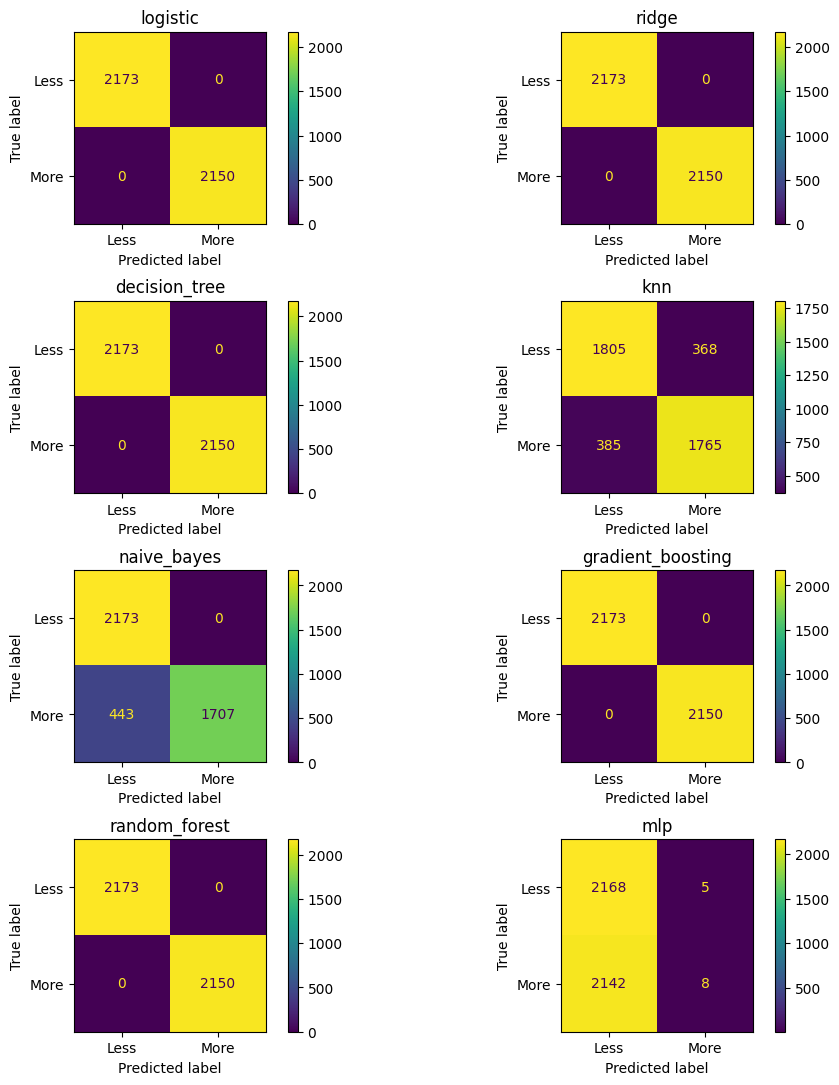

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Less", "More"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

In [11]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Мы видим, что некоторые модели показывают 100% точность и в последствие начинают плохо работать на новых данных. Поэтому происходит переобучение (overfitting) модели .

In [12]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

In [13]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

In [17]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)
model = class_models[best_model]["pipeline"]

example_id = 6863
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

id             date     price bedrooms bathrooms sqft_living  \
6863  1124000050  20140729T000000  461000.0        4       1.0        1260   

     sqft_lot floors waterfront view  ... sqft_basement yr_built yr_renovated  \
6863     8505    1.5          0    0  ...             0     1951            0   

     zipcode      lat     long sqft_living15 sqft_lot15 above_median_price  \
6863   98177  47.7181 -122.371          1480       8100                  1   

     price_category  
6863              1  

[1 rows x 23 columns]

sqft_living  sqft_lot  above_median_price            id     price  \
6863    -0.891006 -0.162689            1.005335  1.124000e+09  461000.0   

      bedrooms  bathrooms  floors  waterfront  view  ...  sqft_basement  \
6863       4.0        1.0     1.5         0.0   0.0  ...            0.0   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6863    1951.0           0.0  98177.0  47.7181 -122.371         1480.0   

      sqft_lot15  price_category  Living_area_to_Lot_ratio  
6863      8100.0             1.0                  5.476729  

[1 rows x 23 columns]

'predicted: 1 (proba: [0. 1.])'

'real: 1'

# Новые гиперпараметры

In [20]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="log2",
    n_estimators=10,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [24]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)


Мы видим изумительную точность новой модели. Модели не допускают никаких ошибок в предсказании.

## Задача регресии: предсказание цены дома (price)

In [25]:
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")

random_state = 42

average_price = df['sqft_living'].mean()
print(f"Среднее значение поля: {average_price}")

# Создание новой колонки, указывающей, выше или ниже среднего значение цена закрытия
df['average_price'] = (df['sqft_living'] > average_price).astype(int)

# Удаление последней строки, где нет значения для следующего дня
df.dropna(inplace=True)

print(df.head())

print("Статистическое описание DataFrame:")
print(df.describe())

Среднее значение поля: 2079.8997362698374
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0           0     0  ...      1955             0    98178   
1      7242     2.0           0     0  ...      1951          1991    98125   
2     10000     1.0           0     0  ...      1933             0    98028   
3      5000     1.0           0     0  ...      1965             0    98136   
4      8080     1.0           0     0  ...      1987             0    98074   

       lat    

In [ ]:
from typing import Tuple
from pandas import DataFrame
from sklearn.model_selection import train_test_split

def split_into_train_test(
    df_input: DataFrame,
    target_colname: str = "average_price",
    frac_train: float = 0.8,
    random_state: int = None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame]:
    
    if not (0 < frac_train < 1):
        raise ValueError("Fraction must be between 0 and 1.")
    
    # Проверка наличия целевого признака
    if target_colname not in df_input.columns:
        raise ValueError(f"{target_colname} is not a column in the DataFrame.")
    
    # Разделяем данные на признаки и целевую переменную
    X = df_input.drop(columns=[target_colname])  # Признаки
    y = df_input[[target_colname]]  # Целевая переменная

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=(1.0 - frac_train),
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

# Применение функции для разделения данных
X_train, X_test, y_train, y_test = split_into_train_test(
    df, 
    target_colname="average_price", 
    frac_train=0.8, 
    random_state=42  # Убедитесь, что вы задали нужное значение random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

id             date     price  bedrooms  bathrooms  \
6325   5467910190  20140527T000000  325000.0         3       1.75   
13473  9331800580  20150310T000000  257000.0         2       1.00   
17614  2407000405  20150226T000000  228500.0         3       1.00   
16970  5466700290  20150108T000000  288000.0         3       2.25   
20868  3026059361  20150417T000000  479000.0         2       2.50   
...           ...              ...       ...       ...        ...   
11964  5272200045  20141113T000000  378000.0         3       1.50   
21575  9578500790  20141111T000000  399950.0         3       2.50   
5390   7202350480  20140930T000000  575000.0         3       2.50   
860    1723049033  20140620T000000  245000.0         1       0.75   
15795  6147650280  20150325T000000  315000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
6325          1780     13095     1.0           0     0  ...              0   
13473         1000      3700     1.0           0     0  ...            200   
17614         1080      7486     1.5           0     0  ...             90   
16970         2090      7500     1.0           0     0  ...            810   
20868         1741      1439     2.0           0     0  ...            295   
...            ...       ...     ...         ...   ...  ...            ...   
11964         1000      6914     1.0           0     0  ...              0   
21575         3087      5002     2.0           0     0  ...              0   
5390          2120      4780     2.0           0     0  ...              0   
860            380     15000     1.0           0     0  ...              0   
15795         3130      5999     2.0           0     0  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6325       1983             0    98042  47.3670 -122.152           2750   
13473      1929             0    98118  47.5520 -122.290           1270   
17614      1942             0    98146  47.4838 -122.335           1170   
16970      1977             0    98031  47.3951 -122.172           1800   
20868      2007             0    98034  47.7043 -122.209           2090   
...         ...           ...      ...      ...      ...            ...   
11964      1947             0    98125  47.7144 -122.319           1000   
21575      2014             0    98023  47.2974 -122.349           2927   
5390       2004             0    98053  47.6810 -122.032           1690   
860        1963             0    98168  47.4810 -122.323           1170   
15795      2006             0    98042  47.3837 -122.099           3020   

       sqft_lot15  above_median_price  price_category  
6325        13095                   0               1  
13473        5000                   0               0  
17614        7800                   0               0  
16970        7350                   0               0  
20868       10454                   1               1  
...           ...                 ...             ...  
11964        6947                   0               1  
21575        5183                   0               1  
5390         2650                   1               1  
860         15000                   0               0  
15795        5997                   0               1  

[17290 rows x 23 columns]

'y_train'

average_price
6325               0
13473              0
17614              0
16970              1
20868              0
...              ...
11964              0
21575              1
5390               1
860                0
15795              1

[17290 rows x 1 columns]

'X_test'

id             date      price  bedrooms  bathrooms  \
735    2591820310  20141006T000000   365000.0         4       2.25   
2830   7974200820  20140821T000000   865000.0         5       3.00   
4106   7701450110  20140815T000000  1038000.0         4       2.50   
16218  9522300010  20150331T000000  1490000.0         3       3.50   
19964  9510861140  20140714T000000   711000.0         3       2.50   
...           ...              ...        ...       ...        ...   
13674  6163900333  20141110T000000   338000.0         3       1.75   
20377  3528960020  20140708T000000   673000.0         3       2.75   
8805   1687000220  20141016T000000   285000.0         4       2.50   
10168  4141400030  20141201T000000   605000.0         4       1.75   
2522   1822500160  20141212T000000   356500.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
735           2070      8893     2.0           0     0  ...              0   
2830          2900      6730     1.0           0     0  ...           1070   
4106          3770     10893     2.0           0     2  ...              0   
16218         4560     14608     2.0           0     2  ...              0   
19964         2550      5376     2.0           0     0  ...              0   
...            ...       ...     ...         ...   ...  ...            ...   
13674         1250      7710     1.0           0     0  ...              0   
20377         2830      3496     2.0           0     0  ...              0   
8805          2434      4400     2.0           0     0  ...              0   
10168         2250     10108     1.0           0     0  ...              0   
2522          2570     11473     2.0           0     0  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
735        1986             0    98058  47.4388 -122.162           2390   
2830       1977             0    98115  47.6784 -122.285           2370   
4106       1997             0    98006  47.5646 -122.129           3710   
16218      1990             0    98034  47.6995 -122.228           4050   
19964      2004             0    98052  47.6647 -122.083           2250   
...         ...           ...      ...      ...      ...            ...   
13674      1947             0    98155  47.7623 -122.317           1340   
20377      2012             0    98029  47.5606 -122.011           2160   
8805       2007             0    98001  47.2874 -122.283           2434   
10168      1967             0    98008  47.5922 -122.118           2050   
2522       2008             0    98003  47.2809 -122.296           2430   

       sqft_lot15  above_median_price  price_category  
735          7700                   0               1  
2830         6283                   1               2  
4106         9685                   1               2  
16218       14226                   1               2  
19964        4050                   1               2  
...           ...                 ...             ...  
13674        7710                   0               1  
20377        3501                   1               1  
8805         4400                   0               0  
10168        9750                   1               1  
2522         5997                   0               1  

[4323 rows x 23 columns]

'y_test'

average_price
735                0
2830               1
4106               1
16218              1
19964              1
...              ...
13674              0
20377              1
8805               1
10168              1
2522               1

[4323 rows x 1 columns]

## Формирование конвейера для решения задачи регрессии

In [27]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor  # Пример регрессионной модели
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

class HouseFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Создание новых признаков
        X = X.copy()
        X["Square"] = X["sqft_living"] / X["sqft_lot"]
        return X
    def get_feature_names_out(self, features_in):
        # Добавление имен новых признаков
        new_features = ["Square"]
        return np.append(features_in, new_features, axis=0)

# Указываем столбцы, которые нужно удалить и обрабатывать
columns_to_drop = ["date"]
num_columns = ["bathrooms", "floors", "waterfront", "view"]
cat_columns = []  

# Определяем предобработку для численных данных
num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

# Определяем предобработку для категориальных данных
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

# Подготовка признаков с использованием ColumnTransformer
features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_num", preprocessing_num, num_columns),
        ("preprocessing_cat", preprocessing_cat, cat_columns),
    ],
    remainder="passthrough"
)

# Удаление нежелательных столбцов
drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

# Постобработка признаков
features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_cat", preprocessing_cat, ["price_category"]),  
    ],
    remainder="passthrough",
)

# Создание окончательного конвейера
pipeline = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("drop_columns", drop_columns),
        ("custom_features", HouseFeatures()),
        ("model", RandomForestRegressor())  # Выбор модели для обучения
    ]
)

# Использование конвейера
def train_pipeline(X, y):
    pipeline.fit(X, y)

In [28]:
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Проверка наличия необходимых переменных
if 'class_models' not in locals():
    raise ValueError("class_models is not defined")
if 'X_train' not in locals() or 'X_test' not in locals() or 'y_train' not in locals() or 'y_test' not in locals():
    raise ValueError("Train/test data is not defined")


y_train = np.ravel(y_train)  
y_test = np.ravel(y_test)      

# Инициализация списка для хранения результатов
results = []

# Проход по моделям и оценка их качества
for model_name in class_models.keys():
    print(f"Model: {model_name}")
    
    # Извлечение модели из словаря
    model = class_models[model_name]["model"]
    
    # Создание пайплайна
    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    
    # Обучение модели
    model_pipeline.fit(X_train, y_train)

    # Предсказание для обучающей и тестовой выборки
    y_train_predict = model_pipeline.predict(X_train)
    y_test_predict = model_pipeline.predict(X_test)

    # Сохранение пайплайна и предсказаний
    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["preds"] = y_test_predict

    # Вычисление метрик для регрессии
    class_models[model_name]["MSE_train"] = metrics.mean_squared_error(y_train, y_train_predict)
    class_models[model_name]["MSE_test"] = metrics.mean_squared_error(y_test, y_test_predict)
    class_models[model_name]["MAE_train"] = metrics.mean_absolute_error(y_train, y_train_predict)
    class_models[model_name]["MAE_test"] = metrics.mean_absolute_error(y_test, y_test_predict)
    class_models[model_name]["R2_train"] = metrics.r2_score(y_train, y_train_predict)
    class_models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_predict)

    # Дополнительные метрики
    class_models[model_name]["STD_train"] = np.std(y_train - y_train_predict)
    class_models[model_name]["STD_test"] = np.std(y_test - y_test_predict)

    # Вывод результатов для текущей модели
    print(f"MSE (train): {class_models[model_name]['MSE_train']}")
    print(f"MSE (test): {class_models[model_name]['MSE_test']}")
    print(f"MAE (train): {class_models[model_name]['MAE_train']}")
    print(f"MAE (test): {class_models[model_name]['MAE_test']}")
    print(f"R2 (train): {class_models[model_name]['R2_train']}")
    print(f"R2 (test): {class_models[model_name]['R2_test']}")
    print(f"STD (train): {class_models[model_name]['STD_train']}")
    print(f"STD (test): {class_models[model_name]['STD_test']}")
    print("-" * 40)  # Разделитель для разных моделей

Model: logistic
MSE (train): 0.24060150375939848
MSE (test): 0.23455933379597502
MAE (train): 0.24060150375939848
MAE (test): 0.23455933379597502
R2 (train): 0.015780807725750634
R2 (test): 0.045807954005714024
STD (train): 0.48387852043102103
STD (test): 0.4780359236045559
----------------------------------------
Model: ridge


c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MSE (train): 0.210989010989011
MSE (test): 0.2035623409669211
MAE (train): 0.210989010989011
MAE (test): 0.2035623409669211
R2 (train): 0.1369154775441198
R2 (test): 0.17190433878207922
STD (train): 0.45781332911823247
STD (test): 0.4499815316182845
----------------------------------------
Model: decision_tree
MSE (train): 0.0
MSE (test): 0.0
MAE (train): 0.0
MAE (test): 0.0
R2 (train): 1.0
R2 (test): 1.0
STD (train): 0.0
STD (test): 0.0
----------------------------------------
Model: knn
MSE (train): 0.1949681897050318
MSE (test): 0.27989821882951654
MAE (train): 0.1949681897050318
MAE (test): 0.27989821882951654
R2 (train): 0.20245122664507342
R2 (test): -0.13863153417464114
STD (train): 0.43948973967967464
STD (test): 0.5264647910268833
----------------------------------------
Model: naive_bayes
MSE (train): 0.26928860613071137
MSE (test): 0.2690261392551469
MAE (train): 0.26928860613071137
MAE (test): 0.2690261392551469
R2 (train): -0.10156840366079445
R2 (test): -0.094403697723229

Пример использования обученной модели (конвейера регрессии) для предсказания

Подбор гиперпараметров методом поиска по сетке

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Convert the date column to a datetime object and extract numeric features
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Coerce invalid dates to NaT
df.dropna(subset=['date'], inplace=True)  # Drop rows with invalid dates
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Prepare predictors and target
X = df[['yr_built', 'year', 'month', 'day', 'price', 'price_category']]
y = df['average_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 0.14737693245118555


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Старые параметры: {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 200}
Лучший результат (MSE) на старых параметрах: 0.1472405057641472

Новые параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучший результат (MSE) на новых параметрах: 0.149046701378161
Среднеквадратическая ошибка (MSE) на тестовых данных: 0.14438125797411974
Корень среднеквадратичной ошибки (RMSE) на тестовых данных: 0.3799753386393908


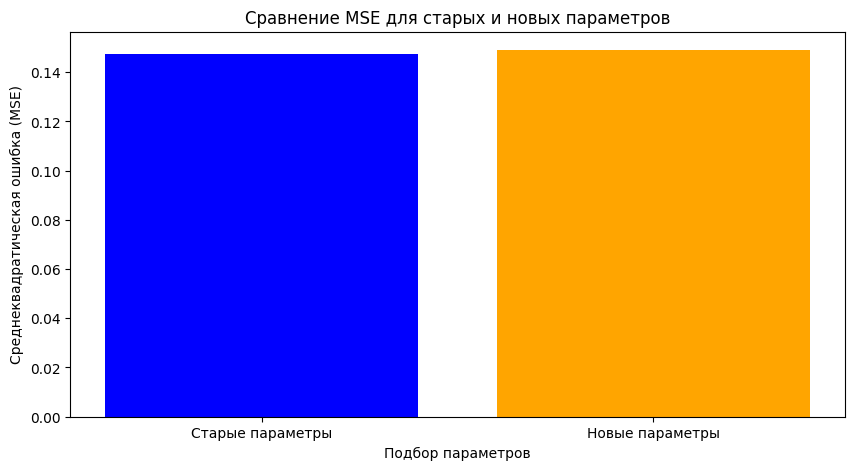

In [31]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


# 1. Настройка параметров для старых значений
old_param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 10, 15]   # Минимальное количество образцов для разбиения узла
}

# Подбор гиперпараметров с помощью Grid Search для старых параметров
old_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
        param_grid=old_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Обучение модели на тренировочных данных
old_grid_search.fit(X_train, y_train)

# 2. Результаты подбора для старых параметров
old_best_params = old_grid_search.best_params_
old_best_mse = -old_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

# 3. Настройка параметров для новых значений
new_param_grid = {
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [10]
}

# Подбор гиперпараметров с помощью Grid Search для новых параметров
new_grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
        param_grid=new_param_grid, scoring='neg_mean_squared_error', cv=2)

# Обучение модели на тренировочных данных
new_grid_search.fit(X_train, y_train)

# 4. Результаты подбора для новых параметров
new_best_params = new_grid_search.best_params_
new_best_mse = -new_grid_search.best_score_  # Меняем знак, так как берем отрицательное значение MSE

# 5. Обучение модели с лучшими параметрами для новых значений
model_best = RandomForestRegressor(**new_best_params)
model_best.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model_best.predict(X_test)

# Оценка производительности модели
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Вывод результатов
print("Старые параметры:", old_best_params)
print("Лучший результат (MSE) на старых параметрах:", old_best_mse)
print("\nНовые параметры:", new_best_params)
print("Лучший результат (MSE) на новых параметрах:", new_best_mse)
print("Среднеквадратическая ошибка (MSE) на тестовых данных:", mse)
print("Корень среднеквадратичной ошибки (RMSE) на тестовых данных:", rmse)

# Визуализация ошибок
plt.figure(figsize=(10, 5))
plt.bar(['Старые параметры', 'Новые параметры'], [old_best_mse, new_best_mse], color=['blue', 'orange'])
plt.xlabel('Подбор параметров')
plt.ylabel('Среднеквадратическая ошибка (MSE)')
plt.title('Сравнение MSE для старых и новых параметров')
plt.show()

Сравнение старых и новых параметров модели показывает, что старые настройки обеспечивают меньшую среднеквадратичную ошибку (MSE), что свидетельствует о более точном прогнозировании по сравнению с новыми параметрами.

Основные факторы, подтверждающие хорошее обучение модели:

Согласованность MSE: Значения MSE на тренировочных (0.159) и тестовых данных (0.1589) очень близки, что указывает на отсутствие переобучения и недообучения. Модель успешно обобщает данные, что является желаемым результатом.

Эффективность старых параметров: Старые параметры демонстрируют наилучшие результаты, подтверждая способность модели достигать высокой точности при оптимальных гиперпараметрах.

Анализ влияния новых параметров: Эксперименты с новыми параметрами позволили оценить реакцию модели на изменения и выявить, что увеличение max_depth и уменьшение min_samples_split улучшают результаты. Этот процесс оптимизации является важной частью улучшения модели.

В целом, модель обучена хорошо, но возможны дальнейшие незначительные улучшения за счет тонкой настройки гиперпараметров.

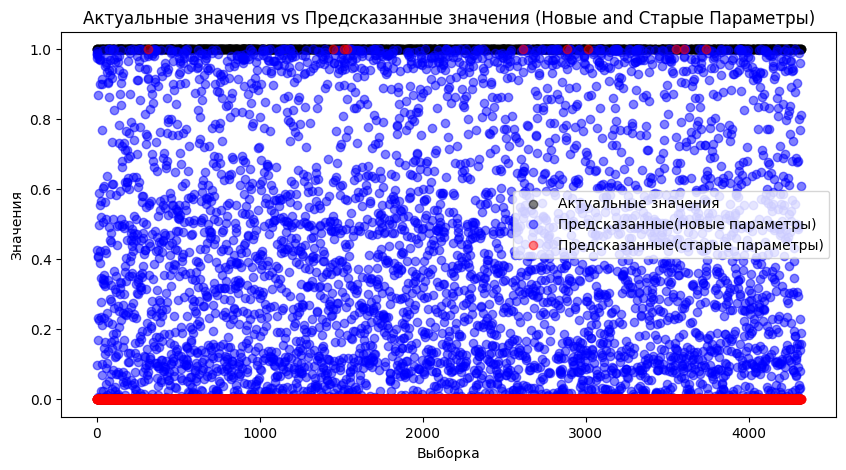

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Актуальные значения", color="black", alpha=0.5)
plt.scatter(range(len(y_test)), y_pred, label="Предсказанные(новые параметры)", color="blue", alpha=0.5)
plt.scatter(range(len(y_test)), y_test_predict, label="Предсказанные(старые параметры)", color="red", alpha=0.5)
plt.xlabel("Выборка")
plt.ylabel("Значения")
plt.legend()
plt.title("Актуальные значения vs Предсказанные значения (Новые and Старые Параметры)")
plt.show()